<a href="https://colab.research.google.com/github/ginots/Data-Science-Research/blob/main/OpenCV/Human_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe opencv-python matplotlib


After next block, restart session and run from block 1 avoiding next block. We need mediapipe version 0.10.13 to access module "solutions" and its absent in latest version of mediapipe.

In [2]:
!pip uninstall -y mediapipe
!pip install mediapipe==0.10.13

Found existing installation: mediapipe 0.10.32
Uninstalling mediapipe-0.10.32:
  Successfully uninstalled mediapipe-0.10.32
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
ydf 0.14.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.2

In [2]:
import mediapipe as mp
print("MediaPipe version:", mp.__version__)
print("Has solutions:", hasattr(mp, "solutions"))

MediaPipe version: 0.10.13
Has solutions: True


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
# image_path = "/content/drive/MyDrive/Datasets/person1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Saving asif_ali.jpg to asif_ali.jpg


In [5]:
mp_selfie = mp.solutions.selfie_segmentation
segmenter = mp_selfie.SelfieSegmentation(model_selection=1)

In [6]:
results = segmenter.process(image)

mask = results.segmentation_mask

In [7]:
binary_mask = mask > 0.6

In [8]:
person_only = image.copy()
person_only[~binary_mask] = [0, 0, 0]

In [9]:
rgba = cv2.cvtColor(person_only, cv2.COLOR_RGB2RGBA)
rgba[~binary_mask] = [0, 0, 0, 0]

In [10]:
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

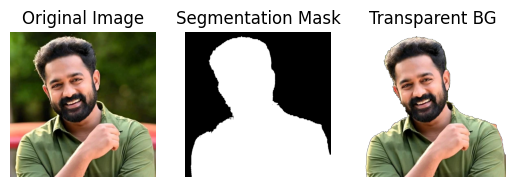

In [11]:
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Segmentation Mask")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Transparent BG")
plt.imshow(rgba)
plt.axis("off")

plt.show()

In [12]:
cv2.imwrite("person_mask.png", (binary_mask * 255).astype(np.uint8))
cv2.imwrite("person_transparent.png", cv2.cvtColor(rgba, cv2.COLOR_RGBA2BGRA))

print("Saved: person_mask.png & person_transparent.png")

Saved: person_mask.png & person_transparent.png
